In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly
import plotly.graph_objects as go
from ipywidgets import widgets

In [2]:
import warnings
warnings.filterwarnings('ignore',category=UserWarning)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_excel('/content/drive/MyDrive/Drill planner/Data/Master_file_saudi_aramco.xlsx',sheet_name='План')
dataset = pd.read_excel('/content/drive/MyDrive/Drill planner/Data/Dataset2.xlsx')

In [5]:
dataset

,Unnamed: 0,Well number,Section,Phase,Trip number,Data,"Depth, m","Time, h","Time, days","Time, h (in grains)",Type of work,Operation code,Operation description,Timestamp,"ROP, m/h"
0,0.0,2083.0,Направление,БУРНАП,1.0,2021-08-06,0.0,02:00:00,0.083333,2.000000,Сборка роторной КНБК,301.0,Сборка КНБК,2022-01-01 00:00:00,NaN
1,1.0,2083.0,Направление,БУРНАП,1.0,2021-08-06,41.9,07:50:00,0.326389,7.833333,Бурение с вращением без ВЗД,204.0,"Бурение в инт. 10.3-41.9м (G=2-5т, Qвх=20-50л/...",2022-01-01 07:50:00,5.348936
2,2.0,2083.0,Направление,БУРНАП,1.0,2021-08-06,41.9,02:00:00,0.083333,2.000000,Проработка перед наращиванием,419.0,Проработка,2022-01-01 09:50:00,NaN
3,3.0,2083.0,Направление,БУРНАП,1.0,2021-08-06,41.9,01:20:00,0.055556,1.333333,Наращивание во время бурения трубкой (с мостков),304.0,Наращивание (3раза),2022-01-01 11:10:00,NaN
4,4.0,2083.0,Направление,БУРНАП,1.0,2021-08-06,41.9,00:25:00,0.017361,0.416667,Шаблонировка вверх,323.0,Подъем инструмента (шаблонирование) в инт. 31....,2022-01-01 11:35:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5733,6657.0,3094.0,Хвостовик,КРЕПХВОСТ,NaN,2022-05-03,4780.0,00:20:00,0.013889,0.333333,Промывка без расхаживания с вращением БИ,402.0,ПР к вымыву ДТ.,2022-03-26 01:20:00,NaN
5734,6658.0,3094.0,Хвостовик,КРЕПХВОСТ,NaN,2022-05-03,4780.0,01:15:00,0.052083,1.583333,Перевод на жидкость заканчивания,411.0,Обратная промывка через ЦА 320. Вымыв ДТ. (Qвх...,2022-03-26 02:35:00,NaN
5735,6661.0,3094.0,Хвостовик,КРЕПХВОСТ,NaN,2022-05-04,4780.0,01:05:00,0.045139,1.083333,Промывка без расхаживания и вращения БИ,403.0,"Промывка, перевод скважины на KCl плотностью 1...",2022-03-26 04:30:00,NaN
5736,6662.0,3094.0,Хвостовик,КРЕПХВОСТ,NaN,2022-05-04,4780.0,10:30:00,0.437500,10.500000,Подъем БИ с выбросом на мостки в обсаженном ст...,326.0,Подъем транспортировочной колонны в инт. 3548....,2022-03-26 15:00:00,NaN


In [6]:
def well_extraction(data,well_number,GGD_graph=False):
    d = data[data['Номер скважины'] == well_number]
    if GGD_graph:
        d = d[['Глубина','Нарастающее время, сут']]
    return d

In [7]:
df['Класс'] = df['Класс'].str.upper()
well_name = df['Номер скважины'].unique().tolist()

In [8]:
well_name

[2057, 3131, 2076, 2084, 2083, 1057, 3044]

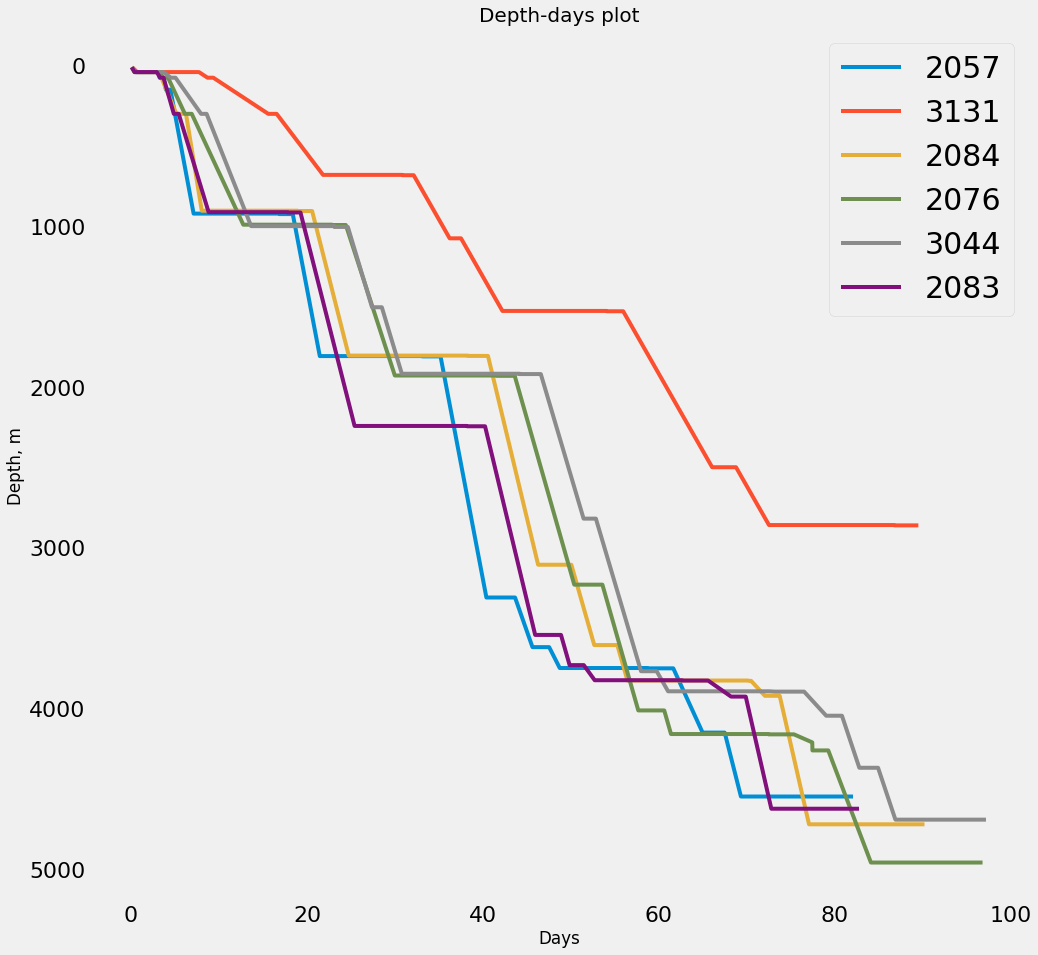

In [9]:
plt.style.use('fivethirtyeight')
depth_2057 = well_extraction(df,2057,GGD_graph=True).iloc[:,0].values
time_2057 = well_extraction(df,2057,GGD_graph=True).iloc[:,1].values

depth_2084 = well_extraction(df,2084,GGD_graph=True).iloc[:,0].values
time_2084 = well_extraction(df,2084,GGD_graph=True).iloc[:,1].values

depth_3131 = well_extraction(df,3131,GGD_graph=True).iloc[:,0].values
time_3131 = well_extraction(df,3131,GGD_graph=True).iloc[:,1].values

depth_2076 = well_extraction(df,2076,GGD_graph=True).iloc[:,0].values
time_2076 = well_extraction(df,2076,GGD_graph=True).iloc[:,1].values

depth_3044 = well_extraction(df,3044,GGD_graph=True).iloc[:,0].values
time_3044 = well_extraction(df,3044,GGD_graph=True).iloc[:,1].values

depth_2083 = well_extraction(df,2083,GGD_graph=True).iloc[:,0].values
time_2083 = well_extraction(df,2083,GGD_graph=True).iloc[:,1].values

fig, ax = plt.subplots(1,1, figsize=(15,15))
plt.title('Depth-days plot',fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=22)
ax = plt.gca()
ax.invert_yaxis()

ax.plot(time_2057,depth_2057,label='2057',linewidth=4)
ax.plot(time_3131,depth_3131,label='3131',linewidth=4)

ax.plot(time_2084,depth_2084,label='2084',linewidth=4)
ax.plot(time_2076,depth_2076,label='2076',linewidth=4)
ax.plot(time_3044,depth_3044,label='3044',linewidth=4)


ax.plot(time_2083,depth_2083,label='2083',linewidth=4)
ax.legend( prop={'size': 30})
ax.set_xlabel('Days')
ax.set_ylabel('Depth, m')
ax.grid()
#plot.legend(loc=2, prop={'size': 6})

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9977 entries, 0 to 9976
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Номер скважины            9977 non-null   int64         
 1   Секция                    1495 non-null   object        
 2   Фаза                      1495 non-null   object        
 3   Описание операции         1495 non-null   object        
 4   Рейс                      1011 non-null   float64       
 5   Класс                     1269 non-null   object        
 6   Подкласс                  1271 non-null   object        
 7   Код                       1271 non-null   float64       
 8   Глубина                   1495 non-null   float64       
 9   Время операций, cут       1495 non-null   float64       
 10  Нарастающее время, сут    1495 non-null   float64       
 11  Дата начала               9977 non-null   datetime64[ns]
 12  Дата окончания      

In [11]:
def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

In [12]:
stats = []
for well in well_name[:-1]:
    data = well_extraction(df,well,GGD_graph=False)
    gp = data.groupby(['Секция','Фаза','Подкласс'])['Время операций, cут '].agg(['sum','mean','median',percentile(50)])
    #.agg(['sum', 'mean', 'median', 'min', 'max', 'std', 'var'])
    stats.append(gp)
    
    

In [13]:
dataset.columns

Index(['Unnamed: 0', 'Well number', 'Section', 'Phase', 'Trip number', 'Data',
       'Depth, m', 'Time, h', 'Time, days', 'Time, h (in grains)',
       'Type of work', 'Operation code', 'Operation description', 'Timestamp',
       'ROP, m/h'],
      dtype='object')

In [20]:
stats2 = dataset.groupby(['Section','Phase','Operation code'])['Time, h (in grains)'].agg(['min','mean','median',percentile(30),percentile(50),percentile(50)]).to_csv('stat_per_phase.csv')

In [21]:
ROP = dataset[dataset['ROP, m/h'] > 0]

In [22]:
ROP.groupby(['Phase'])['ROP, m/h'].agg(['min','max','mean','median',percentile(30),percentile(50),percentile(90)]).to_csv('ROP_per_phase.csv')

In [21]:
stats2.iloc[:10,:]

min       mean    median  percentile_30
Section   Phase  Operation code                                              
Кондуктор БУРКОН 201             0.166667  10.193773  7.666667       4.533333
                 212             1.250000   2.620370  2.416667       1.700000
                 302             0.500000   2.021212  1.816667       0.691667
                 303             0.833333   3.569722  3.625000       2.100000
                 305             1.916667   3.291667  3.291667       2.741667
                 306             3.333333   3.333333  3.333333       3.333333
                 307             1.000000   3.123016  3.500000       2.833333
                 308             2.750000   4.760417  4.791667       3.658333
                 315             0.083333   1.751626  1.000000       0.333333
                 317             0.666667   2.472222  1.666667       0.966667

In [ ]:
pd.set_option('display.max_rows',None)
stats